# Steps to build CNN to solve Emergency vs Non-Emergency vehicle classification problem

1. Loading the Dataset
2. Pre-processing the Data
3. Creating Training and Validation set
4. Defining the Model Architecture
5. Compiling the Model
6. Training the Model
7. Evaluating model performance

## 1. Loading the Dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer, BatchNormalization, Dropout
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# unzipping the Dataset.zip file
#!unzip /content/drive/My\ Drive/Dataset.zip

In [4]:
# create random number generator
seed = 42

In [5]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [6]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [7]:
# shape of the images
X.shape

(2352, 224, 224, 3)

## 2. Pre-processing the Data

In [8]:
# since we are using CNN, we do not have to resize the images into 1D array. 

In [9]:
# normalizing the pixel values
X = X / X.max()

## 3. Creating Training and Validation set

In [10]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [11]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

## 4. Defining the Model Architecture

In [12]:
# importing the convolutional and flatten layer from keras
from keras.layers import Conv2D, Flatten

In [13]:
# defining the model architecture

# creating a sequential model 
model = Sequential()
    
# defining input layer with 3D input of shape (224,224,3)
model.add(InputLayer(shape=(224, 224, 3)))

# defining the first convolutional layer with 25 filters of size (5,5)
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# defining the second convolutional layer with 50 filters of size (5,5)
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

# flattening the output from convolutional layers so that it can be forwarded to the dense layers
model.add(Flatten())

# defining the first dense or fully connected layer with 100 neurons
model.add(Dense(units=100, activation='sigmoid'))
# defining the output layer with 1 neuron since it is a binary classification problem
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
# printing summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 25)        │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 216, 216, 50)        │          31,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2332800)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │     233,280,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,313,401 (890.02 MB)

 Trainable params: 233,313,401 (890.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Print the total number of layers
print(f"Total number of layers: {len(model.layers)}")

# Count and print the number of Conv2D layers
conv_layers = [layer for layer in model.layers if isinstance(layer, Conv2D)]
print(f"Number of convolutional layers: {len(conv_layers)}")

# Count and print the number of MaxPool2D layers
#pool_layers = [layer for layer in model.layers if isinstance(layer, MaxPool2D)]
#print(f"Number of pooling layers: {len(pool_layers)}")

Total number of layers: 5
Number of convolutional layers: 2


In [16]:
# Printing the number of filters in each Conv2D layer
for layer in model.layers:
    if isinstance(layer, Conv2D):
        print(f"Layer: {layer.name}, Number of Filters: {layer.filters}")

Layer: conv2d, Number of Filters: 25
Layer: conv2d_1, Number of Filters: 50


## Understanding the Architecture
*  Input shape is (224,224,3) since images are of this shape
*  We then applied 25 filters each of shape (5,5) and stride is (1,1)
*  So the output from first convolutional layer is: **(224-5+1,224-5+1,25)** which is **(220,220,25)**
*  We then applied 50 filters of shape (5,5) each with stride (1,1)
*  Then the output is **(220-5+1,220-5+1,50)** which is **(216,216,50)**
*  Then this output is flattened which resulted in 216 X 216 X 50 = 2332800 features
*  Finally these features are passed through the fully connected layers.


## Understanding the number of parameters of different layers

1.   First Convolutional Layer
    * Number of input channels = 3
    * Number of filters = 25
    * Filter Size = (5,5)
    * Learnable parameters = **25 * 5 * 5 * 3 + 25** (1 bias for each filter) = **1900**
2.   Second Convolutional Layer
    * Number of input channels = 25
    * Number of filters = 50
    * Filter Size = (5,5)
    * Learnable parameters = **50 * 5 * 5 * 25 + 50** (1 bias for each filter) = **31300**
3.   First Fully Connected Layer
    * Number of input features = 216 * 216 * 50 = 2332800
    * Number of neurons in this hidden layer = 100
    * Learnable parameters = **2332800 * 100 + 100** (1 bias for each neuron) = **233280100**
3.   Output Layer
    * Number of input features = 100
    * Number of neurons in this layer = 1
    * Learnable parameters = **100 * 1 + 1** (1 bias for each neuron) = **101**



## 5. Compiling the Model

In [17]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

## 6. Training the Model

In [18]:
# training the model
model_history = model.fit(X_train, y_train, epochs=5, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2644s 159s/step - accuracy: 0.5580 - loss: 1.0017 - val_accuracy: 0.6020 - val_loss: 0.6486
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 868s 31s/step - accuracy: 0.6337 - loss: 0.6451 - val_accuracy: 0.6898 - val_loss: 0.6175
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 242s 18s/step - accuracy: 0.6822 - loss: 0.6137 - val_accuracy: 0.6884 - val_loss: 0.6015
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 239s 18s/step - accuracy: 0.7011 - loss: 0.5816 - val_accuracy: 0.6912 - val_loss: 0.5898
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 447s 36s/step - accuracy: 0.7161 - loss: 0.5801 - val_accuracy: 0.6997 - val_loss: 0.5820


## 7. Evaluating model performance

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0] < 0.5, 0,1)))

In [21]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0] < 0.5, 0,1)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 449ms/step
Accuracy on validation set: 0.6614730878186968


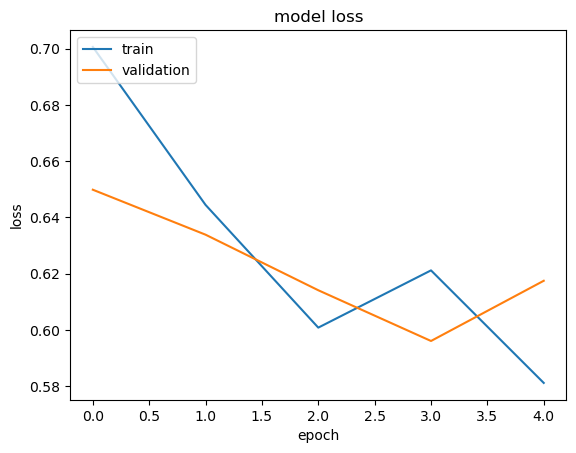

In [22]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

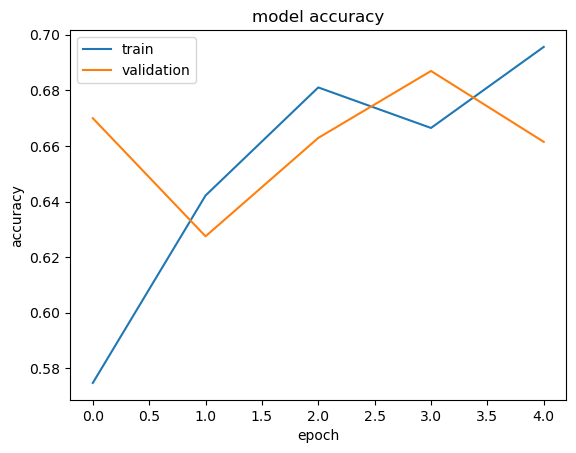

In [23]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Adding Maxpool layer to reduce parameters

In [21]:
# importing maxpool layer from keras
#from tensorflow.keras.layers import MaxPooling2D
from keras.layers import MaxPool2D

In [23]:
# defining the model architecture with maxpool layer
model = Sequential()
    
model.add(InputLayer(shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# adding maxpool layer after the convolutional layers
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [24]:
# summary of the model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 220, 220, 25)        │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 216, 216, 50)        │          31,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 54, 54, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 145800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │      14,580,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,613,401 (55.75 MB)

 Trainable params: 14,613,401 (55.75 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# training the model
model_history = model.fit(X_train, y_train, epochs=1, batch_size=128,validation_data=(X_valid,y_valid))

13/13 ━━━━━━━━━━━━━━━━━━━━ 102s 8s/step - accuracy: 0.6005 - loss: 0.6621 - val_accuracy: 0.6487 - val_loss: 0.6362


In [28]:
model.predict(X_train)

52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 406ms/step


array([[0.34411857],
       [0.53811204],
       [0.493807  ],
       ...,
       [0.33351782],
       [0.4623834 ],
       [0.36611795]], dtype=float32)

In [29]:
model.predict(X_train)[:,0]

52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 388ms/step


array([0.34411857, 0.53811204, 0.493807  , ..., 0.33351782, 0.4623834 ,
       0.36611795], dtype=float32)

In [32]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:, 0] < 0.5, 0, 1)))


52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 379ms/step
Accuracy on training set: 0.6798298906439855


In [34]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0] < 0.5, 0,1)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 365ms/step
Accuracy on validation set: 0.6487252124645893


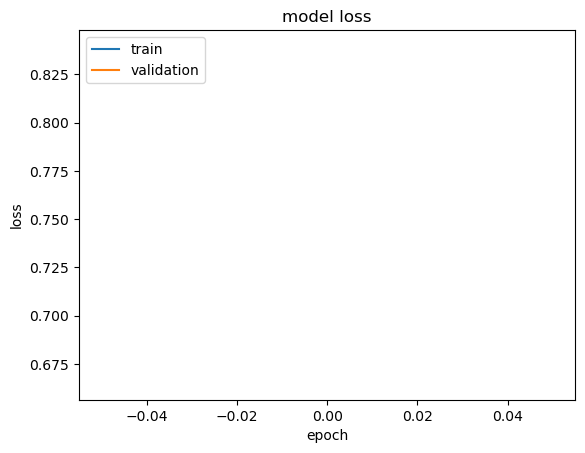

In [14]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

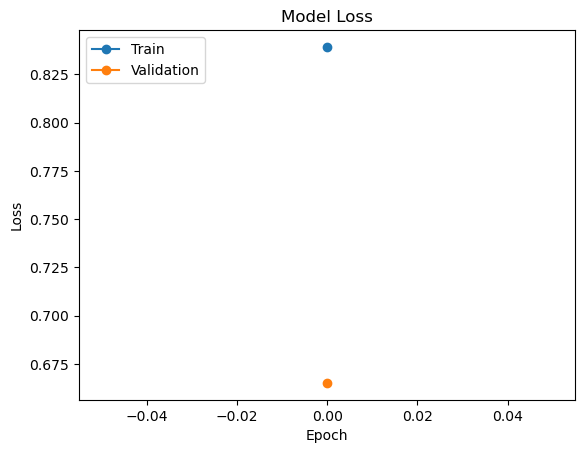

In [15]:
# summarize history for loss
if len(model_history.history['loss']) == 1:
    plt.plot(model_history.history['loss'], marker='o')  # Use markers to indicate single points
    plt.plot(model_history.history['val_loss'], marker='o')
else:
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


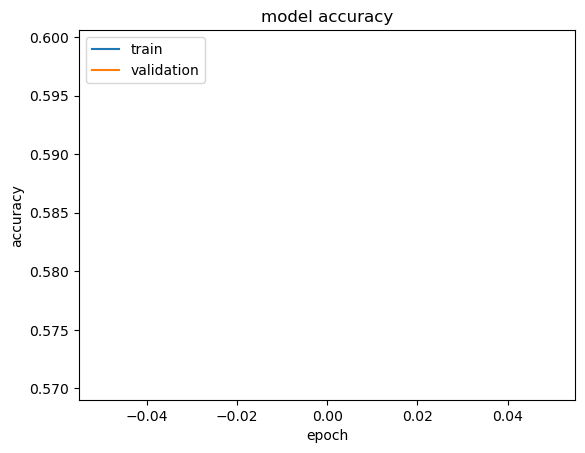

In [16]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Hyperparameter Tuning of Convolutional Neural Networks

1. increase number of convolutional layers
2. increase number of pooling layers
3. increase number of convolutional filters
4. change size of convolutional filters
5. change pooling type 
6. change padding technique
7. change stride

#### Hyperparameters of fully connected layers

1. change activation function of hidden layer
2. increase hidden neurons
3. increase hidden layers
4. increase number of epochs
5. change optimizer
6. add batch normalization layer
7. add dropout layer

## 1. Increasing number of convolutional layers

In [26]:
# increase number of convolutional layers


model = Sequential()
    
model.add(InputLayer(shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 220, 220, 25)        │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 216, 216, 50)        │          31,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 212, 212, 50)        │          62,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 53, 53, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 140450)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │      14,045,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,140,951 (53.94 MB)

 Trainable params: 14,140,951 (53.94 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 232s 17s/step - accuracy: 0.5789 - loss: 0.6776 - val_accuracy: 0.5609 - val_loss: 0.6736
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 210s 16s/step - accuracy: 0.5734 - loss: 0.6685 - val_accuracy: 0.6076 - val_loss: 0.6616
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 202s 16s/step - accuracy: 0.6192 - loss: 0.6553 - val_accuracy: 0.5666 - val_loss: 0.6611
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 204s 16s/step - accuracy: 0.6402 - loss: 0.6344 - val_accuracy: 0.6714 - val_loss: 0.6319
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 203s 16s/step - accuracy: 0.6479 - loss: 0.6357 - val_accuracy: 0.6601 - val_loss: 0.6245
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 204s 16s/step - accuracy: 0.6658 - loss: 0.6265 - val_accuracy: 0.6572 - val_loss: 0.6129
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 202s 16s/step - accuracy: 0.6775 - loss: 0.6155 - val_accuracy: 0.6799 - val_loss: 0.5984
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 204s 16s/step - accuracy: 0.6754 - loss: 0.6036 - val_accuracy: 0.

In [19]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))

Accuracy on training set: 0.6318347509113001 %


In [21]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))

Accuracy on validation set: 0.623229461756374 %


## 2. Increasing number of pooling layers

In [ ]:
# increase number of pooling layers

model = Sequential()
    
model.add(InputLayer(shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 25)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 51, 51, 50)        31300     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               720100    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 5s 3ms/step - loss: 0.6820 - acc: 0.5832 - val_loss: 0.6840 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6764 - acc: 0.5863 - val_loss: 0.6836 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6753 - acc: 0.5863 - val_loss: 0.6831 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6741 - acc: 0.5863 - val_loss: 0.6828 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6731 - acc: 0.5863 - val_loss: 0.6809 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6727 - acc: 0.5863 - val_loss: 0.6801 - val_acc: 0.5609
Epoch 7/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6711 - acc: 0.5863 - val_loss: 0.6790 - val_acc: 0.5609
Epoch 8/10
1646

In [19]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))

Accuracy on training set: 0.6318347509113001 %


In [21]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))

Accuracy on validation set: 0.623229461756374 %


## 3. Increasing number of convolutional filters

In [ ]:
# increase number of convolutional filters

model = Sequential()
    
model.add(InputLayer(shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(75, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 220, 220, 50)      3800      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 216, 216, 75)      93825     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 75)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 218700)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               21870100  
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 21,967,826
Trainable params: 21,967,826
Non-trainable params: 0
__________________________________________

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))



Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 53s 32ms/step - loss: 0.7113 - acc: 0.5468 - val_loss: 0.6912 - val_acc: 0.5510
Epoch 2/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6662 - acc: 0.6063 - val_loss: 0.6732 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6532 - acc: 0.6173 - val_loss: 0.6541 - val_acc: 0.6034
Epoch 4/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6375 - acc: 0.6513 - val_loss: 0.6341 - val_acc: 0.6530
Epoch 5/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6394 - acc: 0.6495 - val_loss: 0.6355 - val_acc: 0.6303
Epoch 6/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6349 - acc: 0.6440 - val_loss: 0.6250 - val_acc: 0.6530
Epoch 7/10
1646/1646 [==============================] - 30s 18ms/step - loss: 0.6257 - acc: 0.6519 - val_loss: 0.6087 - val_acc: 0.6728

In [31]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0] < 0.5, 0,1)))

52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 791ms/step
Accuracy on training set: 0.7168894289185905


In [32]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0] < 0.5, 0,1)))

23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 703ms/step
Accuracy on validation set: 0.7025495750708215


## 4. Changing size of convolutional filters

In [33]:
# change filter size for convolutional layer

model = Sequential()
    
model.add(InputLayer(shape=(224, 224, 3)))

model.add(Conv2D(25, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 222, 222, 25)        │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 220, 220, 50)        │          11,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 55, 55, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 151250)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │      15,125,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,137,201 (57.74 MB)

 Trainable params: 15,137,201 (57.74 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 79s 6s/step - accuracy: 0.5815 - loss: 0.6924 - val_accuracy: 0.5609 - val_loss: 0.6786
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.5992 - loss: 0.6666 - val_accuracy: 0.5609 - val_loss: 0.6706
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 99s 7s/step - accuracy: 0.5841 - loss: 0.6672 - val_accuracy: 0.5652 - val_loss: 0.6629
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.5962 - loss: 0.6533 - val_accuracy: 0.6176 - val_loss: 0.6547
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.6259 - loss: 0.6532 - val_accuracy: 0.5836 - val_loss: 0.6516
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.6214 - loss: 0.6449 - val_accuracy: 0.6402 - val_loss: 0.6401
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.6554 - loss: 0.6372 - val_accuracy: 0.6501 - val_loss: 0.6326
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.6577 - loss: 0.6328 - val_accuracy: 0.6615 - val_loss:

In [19]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0] < 0.5, 0,1)))

Accuracy on training set: 0.6318347509113001 %


In [21]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0] < 0.5, 0,1)))

Accuracy on validation set: 0.623229461756374 %


## 5. Changing pooling size

In [ ]:
# change pooling size

model = Sequential()
    
model.add(InputLayer(shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 108, 108, 50)      0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 583200)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               58320100  
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 58,353,401
Trainable params: 58,353,401
Non-trainable params: 0
__________________________________________

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 26s 16ms/step - loss: 0.6931 - acc: 0.5699 - val_loss: 0.6813 - val_acc: 0.5538
Epoch 2/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6568 - acc: 0.5930 - val_loss: 0.6549 - val_acc: 0.5751
Epoch 3/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6389 - acc: 0.6440 - val_loss: 0.6649 - val_acc: 0.6034
Epoch 4/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6316 - acc: 0.6379 - val_loss: 0.6089 - val_acc: 0.6771
Epoch 5/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6169 - acc: 0.6677 - val_loss: 0.5992 - val_acc: 0.6841
Epoch 6/10
1646/1646 [==============================] - 14s 8ms/step - loss: 0.6320 - acc: 0.6440 - val_loss: 0.5894 - val_acc: 0.6983
Epoch 7/10
1646/1646 [==============================] - 14s 9ms/step - loss: 0.5779 - acc: 0.7175 - val_loss: 0.5742 - val_acc: 0.7040
Epoch 8

In [19]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))

Accuracy on training set: 0.6318347509113001 %


In [21]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))

Accuracy on validation set: 0.623229461756374 %


## 6. Changing padding technique

In [ ]:
# change padding technique

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 25)      1900      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 50)      31300     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 50)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 156800)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               15680100  
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 15,713,401
Trainable params: 15,713,401
Non-trainable params: 0
__________________________________________

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 24s 14ms/step - loss: 0.6736 - acc: 0.5863 - val_loss: 0.6756 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6631 - acc: 0.5978 - val_loss: 0.6573 - val_acc: 0.6473
Epoch 3/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6510 - acc: 0.6324 - val_loss: 0.6431 - val_acc: 0.6530
Epoch 4/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6400 - acc: 0.6452 - val_loss: 0.6339 - val_acc: 0.6416
Epoch 5/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6289 - acc: 0.6586 - val_loss: 0.6321 - val_acc: 0.6275
Epoch 6/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6182 - acc: 0.6652 - val_loss: 0.6086 - val_acc: 0.6686
Epoch 7/10
1646/1646 [==============================] - 12s 7ms/step - loss: 0.6193 - acc: 0.6713 - val_loss: 0.6364 - val_acc: 0.6190
Epoch 8

In [19]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))

Accuracy on training set: 0.6318347509113001 %


In [21]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))

Accuracy on validation set: 0.623229461756374 %


## 7. Changing stride

In [ ]:
# changing stride

model = Sequential()
    
model.add(InputLayer(shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 110, 110, 25)      1900      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 50)      31300     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 50)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 33800)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               3380100   
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 3,413,401
Trainable params: 3,413,401
Non-trainable params: 0
____________________________________________

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6764 - acc: 0.5863 - val_loss: 0.6826 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6726 - acc: 0.5869 - val_loss: 0.6832 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6698 - acc: 0.5863 - val_loss: 0.6743 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6647 - acc: 0.5863 - val_loss: 0.6675 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6613 - acc: 0.5923 - val_loss: 0.6634 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6583 - acc: 0.5960 - val_loss: 0.6576 - val_acc: 0.5793
Epoch 7/10
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6532 - acc: 0.6118 - val_loss: 0.6537 - val_acc: 0.5779
Epoch 8/10
1646

In [19]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))

Accuracy on training set: 0.6318347509113001 %


In [21]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))

Accuracy on validation set: 0.623229461756374 %


## Combining Hyperparameter tuning

In [ ]:
# defining the model architecture with maxpool layer

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 220, 220, 50)      3800      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 50)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 50)      62550     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 50)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 33800)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               3380100   
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)             

In [ ]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/100
1646/1646 [==============================] - 14s 8ms/step - loss: 0.8870 - acc: 0.5820 - val_loss: 0.9441 - val_acc: 0.6261
Epoch 2/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6971 - acc: 0.6950 - val_loss: 0.5143 - val_acc: 0.7635
Epoch 3/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.5948 - acc: 0.7266 - val_loss: 0.4687 - val_acc: 0.7762
Epoch 4/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.5238 - acc: 0.7618 - val_loss: 0.4894 - val_acc: 0.7677
Epoch 5/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.4799 - acc: 0.8001 - val_loss: 0.5443 - val_acc: 0.7337
Epoch 6/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.4545 - acc: 0.8001 - val_loss: 0.6658 - val_acc: 0.7181
Epoch 7/100
1646/1646 [==============================] - 8s 5ms/step - loss: 0.3866 - acc: 0.8256 - val_loss: 0.6150 - val_acc: 0.7153
Epoch 8

In [19]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))

Accuracy on training set: 0.6318347509113001 %


In [21]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))

Accuracy on validation set: 0.623229461756374 %


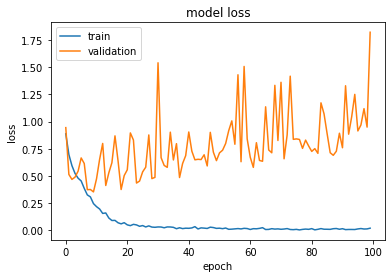

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

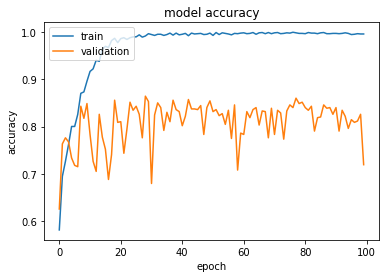

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Model Loss Interpretation( Does Model overfit on training Data)

The plot shows the model's training and validation loss over 100 epochs. Below is the detailed interpretation:

1. **Training Loss (blue curve)**:
   - The training loss decreases steadily and flattens out after around 20 epochs.
   - This indicates that the model is learning and fitting well to the training data.

2. **Validation Loss (orange curve)**:
   - The validation loss decreases initially, similar to the training loss, but after around 10–15 epochs, it begins to fluctuate and increases substantially, with large spikes as training progresses.
   - This behavior suggests **overfitting**: the model learns the training data well, but struggles to generalize to unseen validation data. Overfitting occurs when the model becomes too specific to the training set, performing poorly on the validation set.

### Key Points:
- **Overfitting**: After about 10–15 epochs, the validation loss increases significantly while the training loss continues to decrease. This means the model fits the training data too well, at the expense of performance on new, unseen data.


### Model Accuracy Interpretation

The plot shows the model's training and validation accuracy over 100 epochs. Below is the detailed interpretation:

1. **Training Accuracy (blue curve)**:
   - The training accuracy rapidly increases and reaches nearly 100% (perfect accuracy) within the first 20 epochs.
   - After this, the training accuracy remains consistently high, indicating that the model has learned the training data very well.

2. **Validation Accuracy (orange curve)**:
   - The validation accuracy increases initially but then fluctuates around 80% without a clear upward trend.
   - There are significant variations (spikes) in validation accuracy, suggesting that the model is struggling to generalize and maintain consistent accuracy on the validation set.

### Key Points:
- **Overfitting**: The model achieves almost perfect accuracy on the training set but performs inconsistently on the validation set. This indicates overfitting, where the model is highly tuned to the training data but does not generalize well to unseen data.
- **Validation Performance**: The validation accuracy hovers around 80%, and the fluctuations show that the model may be sensitive to specific validation data points, reinforcing the overfitting problem.

### Possible Solutions:
- **Early Stopping**: Stop the training process once the validation accuracy plateaus or starts to fluctuate.
- **Regularization Techniques**: Apply techniques like **dropout** or **L2 regularization** to prevent the model from overfitting.
- **Cross-Validation**: Use cross-validation to ensure that the model's performance generalizes better across different subsets of the data.


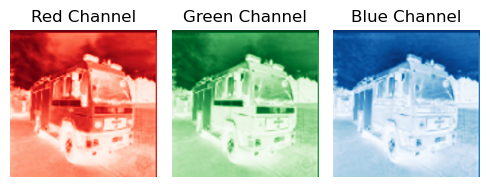

In [18]:
# Adjusting the plot to avoid overlapping coordinates

# Plot the red, green, and blue channels with proper spacing
plt.figure(figsize=(5, 5))

# Red channel
plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')  # Turn off axis to avoid overlap

# Green channel
plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')  # Turn off axis to avoid overlap

# Blue channel
plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')  # Turn off axis to avoid overlap

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


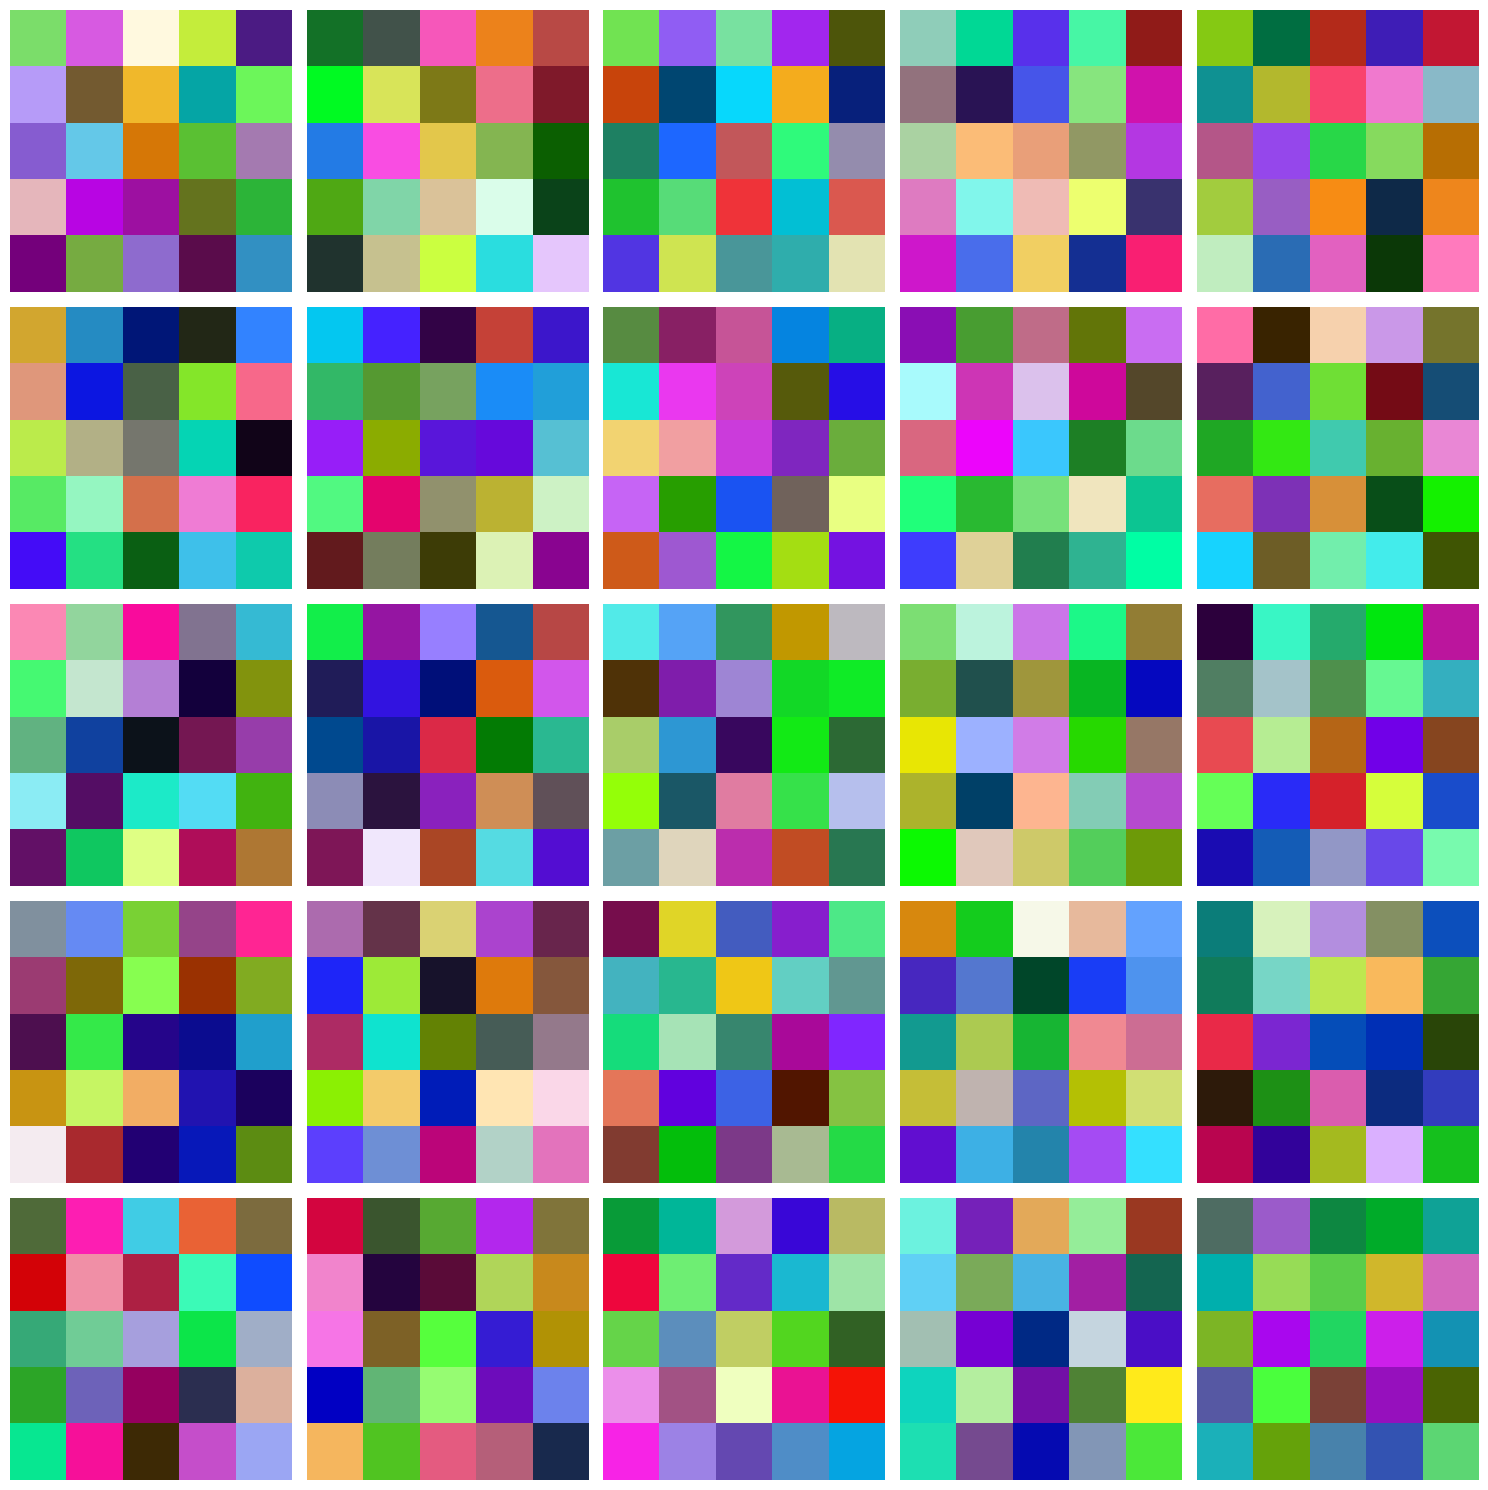

In [19]:
# Creating and plotting 25 random filters of size 5x5x3
import numpy as np

# Generate 25 random filters of size 5x5x3
filters = np.random.rand(25, 5, 5, 3)

# Plotting the filters
plt.figure(figsize=(15, 15))

for i in range(25):
    plt.subplot(5, 5, i+1)
    # Normalize filter for better visualization
    filter_normalized = (filters[i] - filters[i].min()) / (filters[i].max() - filters[i].min())
    plt.imshow(filter_normalized)
    plt.axis('off')

plt.tight_layout()
plt.show()


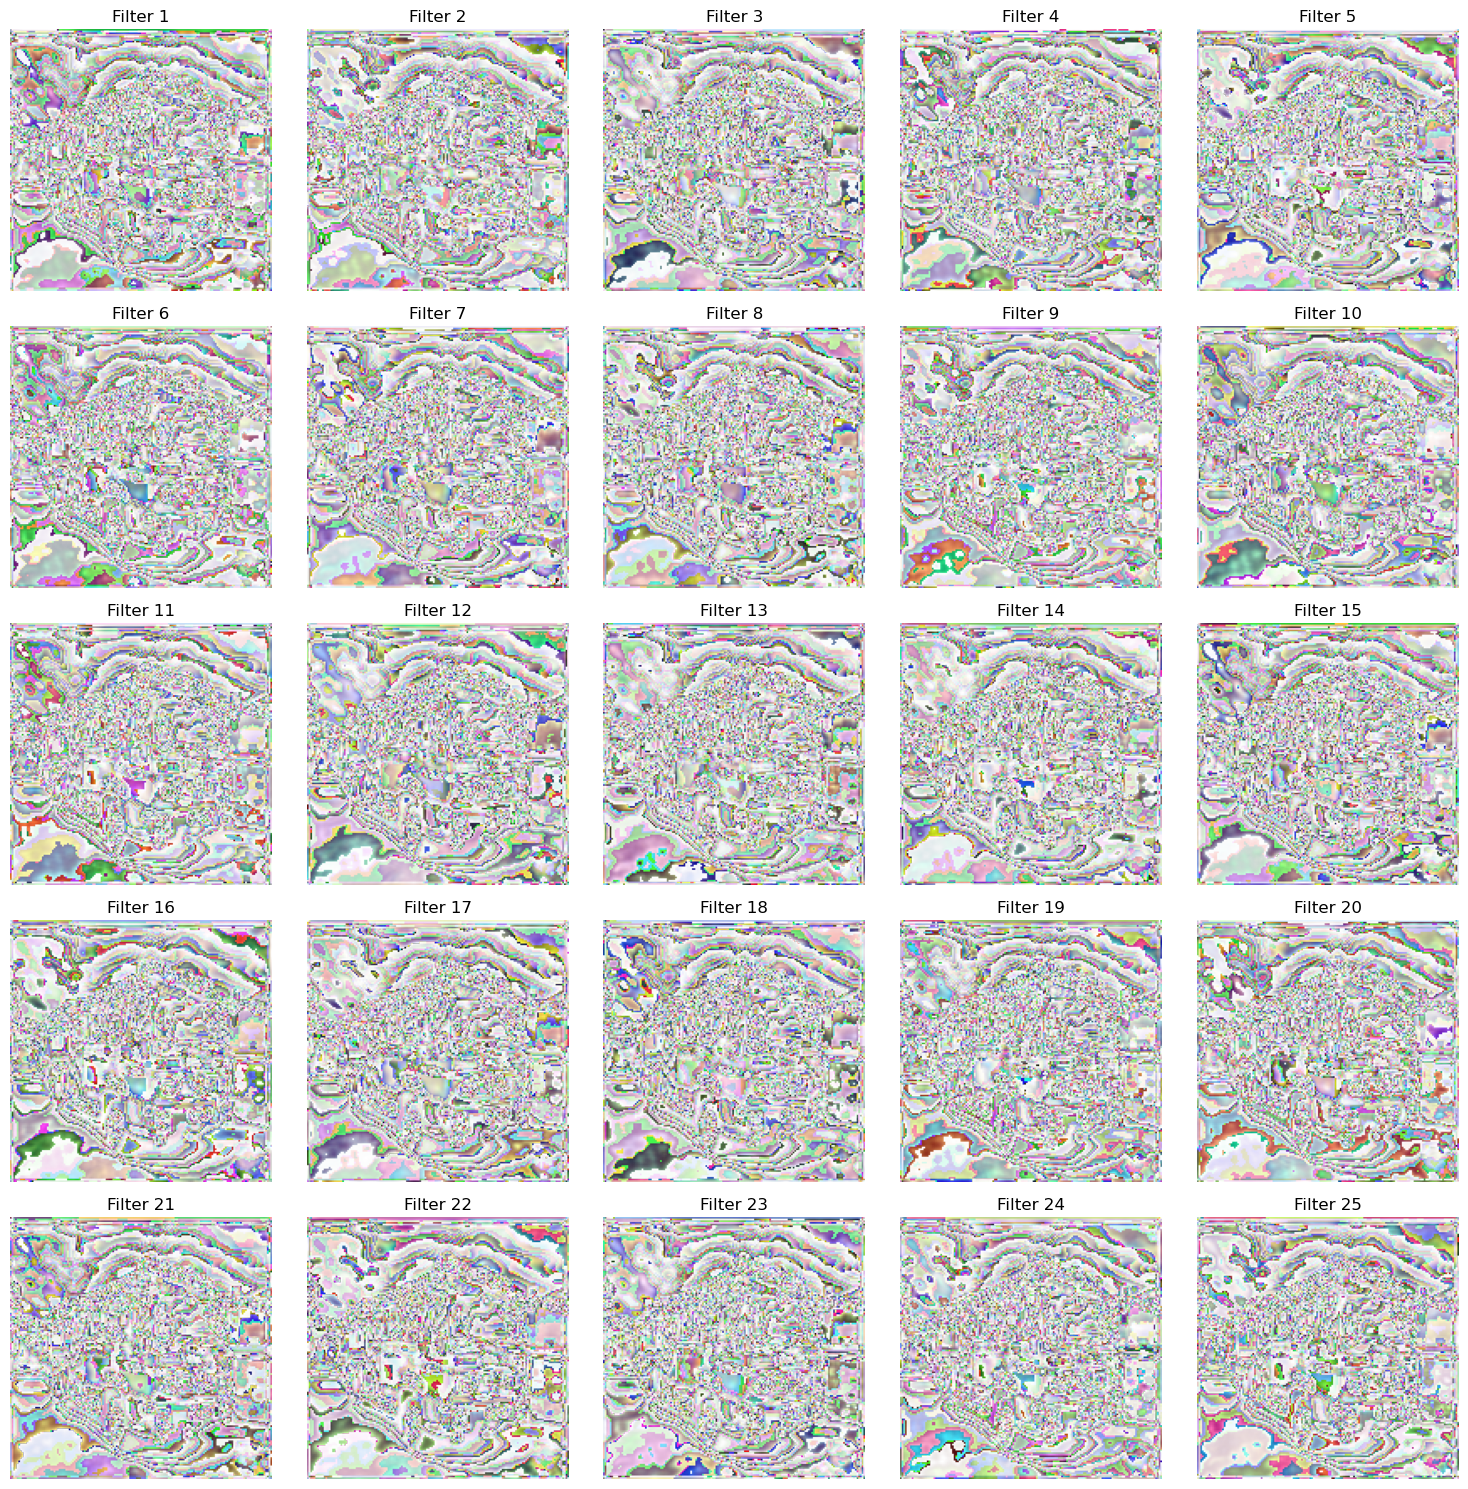

In [20]:
# Define a function to convolve an image with a filter
from scipy.ndimage import convolve

def apply_filter(image, filter_):
    return convolve(image, filter_, mode='constant', cval=0.0)

# Initialize a list to store the results of convolution
convolved_images = []

# Apply each filter to the original image and store the result
for i in range(25):
    # Apply convolution of the image with the filter
    convolved_image = apply_filter(image_np, filters[i])
    convolved_images.append(convolved_image)

# Plotting the convolved images
plt.figure(figsize=(15, 15))

for i in range(25):
    plt.subplot(5, 5, i+1)
    # Normalize for better visualization
    convolved_image_normalized = (convolved_images[i] - convolved_images[i].min()) / (convolved_images[i].max() - convolved_images[i].min())
    plt.imshow(convolved_image_normalized)
    plt.title(f'Filter {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
